# Contents
<a name="Contents"></a>  
* <a href="#Temperature based">Temperature based</a>  
    * <a href="#eq1">Eq.1</a>  
    * <a href="#eq2">Eq.2</a>  
    * <a href="#eq3">Eq.3</a>  
    * <a href="#eq4">Eq.4</a>  
    * <a href="#eq5">Eq.5</a>  
    * <a href="#eq6">Eq.6</a>  
    * <a href="#eq7">Eq.7</a>  
* <a href="#Radiation Based">Radiation Based</a>  
    * <a href="#eq8">Eq.8</a>  
    * <a href="#eq9">Eq.9</a>  
    * <a href="#eq10">Eq.10</a>  
    * <a href="#eq11">Eq.11</a>  
    * <a href="#eq12">Eq.12</a>  
    * <a href="#eq13">Eq.13</a>  
    * <a href="#eq14">Eq.14</a>  
    * <a href="#eq15">Eq.15</a>  
* <a href="#Mass Transfer based">Mass Transfer based</a>  
    * <a href="#eq16">Eq.16</a>  
    * <a href="#eq17">Eq.17</a>  
    * <a href="#eq18">Eq.18</a>  
    * <a href="#eq19">Eq.19</a>  
* <a href="#Combination methods">Combination methods</a>  
    * <a href="#eq20">Eq.20</a>  

## READ DATA

In [1]:
import numpy as np
import sklearn
from sklearn import model_selection
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import scipy
import matplotlib
import seaborn as sns

z = 30
gamma = 0.0674
λ = 2256/1000 # MJ/kg
φ = 40.52

df = pd.read_excel('auth.xlsx', skiprows=[1, 2], index_col = 0, engine='openpyxl')
df = df[df['T']>=0]
X_multi = df.drop('Ετο', axis = 1)
Y_target = df.Ετο
method = None
opts = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-krylov', 'trust-exact']
model_names = ['Romanenko', 'Schendel', 'McCloud', 'FAO Blaney-Criddle', 'Kharrufa', 'Hargreaves', 'Ravazzani', 'Makkink', 'Turc', 'Priestley', 'Jensen', 'Abtew', 'Irmak_a', 'Irmak_b', 'Ritchie', 'WMO', 'Trabert', 'Szasz', 'Valiantzas_a', 'Valiantzas_b']

In [2]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, test_size = 0.30, shuffle = True, random_state=282)

In [3]:
# ex1 = X_train.copy()
# ex1['ETo'] = Y_train
# ex1.to_excel('70% data.xlsx')

# ex2 = X_test.copy()
# ex2['ETo'] = Y_test
# ex2.to_excel('30% data.xlsx')

## Plot intervals

In [4]:
def metrics(O, P):
    O = np.array(O)
    P = np.array(P)
    mae = sklearn.metrics.mean_absolute_error(O, P)
    mse = sklearn.metrics.mean_squared_error(O, P)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((O - P) / O)) * 100
    RSq = sklearn.metrics.r2_score(O, P)
    r2 = scipy.stats.pearsonr(O, P)[0]**2
    nse = (1-(np.sum((P-O)**2)/np.sum((O-np.mean(O))**2)))
    # https://towardsdatascience.com/r%C2%B2-or-r%C2%B2-when-to-use-what-4968eee68ed3
    # r2 =  Pearson correlation coefficient (usually denoted by r) #“how close is the data to the line of best fit?”
    # R2 = R² indicates the distance of points from the 1:1 line
    return mae, mse, rmse, mape, nse, r2

def plot_regression(O, P):
    r2 = metrics(O, P)[-1]
    O = np.array(O)
    P = np.array(P)
    plt.figure(figsize = (6, 6))
    plt.grid(zorder = 1)
    plt.scatter(O, P, edgecolor='black', linewidth=1, zorder = 2)
    regmodel = LinearRegression()
    regmodel.fit(O.reshape(-1,1), P)
    plt.plot(O.reshape(-1,1), regmodel.predict(O.reshape(-1,1)), color = 'orange', linestyle = '--', zorder = 3)
    plt.xlim([0, np.max([O, P]) + 1])
    plt.ylim([0, np.max([O, P]) + 1])
    plt.plot([0, np.max([O, P]) + 1], [0, np.max([O, P]) + 1], 'r--', zorder = 4)
    plt.legend([u'Regression  R\u00b2: {:.3f}'.format(r2), '1:1 Plot', 'Observed - Predicted'])
    plt.xlabel('Observed ETo [mm/d]')
    plt.ylabel('Predicted ETo [mm/d]');

def plot_multregression_or(O, P):
    plt.scatter(O, P, edgecolor='black', linewidth=1, zorder = 2)
    plt.grid(zorder = 1)
    regmodel = LinearRegression()
    regmodel.fit(O.reshape(-1,1), P)
    plt.plot(O.reshape(-1,1), regmodel.predict(O.reshape(-1,1)), color = 'orange', linestyle = '--', zorder = 3)
    plt.xlim([0, np.max([O, P]) + 1])
    plt.ylim([0, np.max([O, P]) + 1])
    plt.plot([0, np.max([O, P]) + 1], [0, np.max([O, P]) + 1], 'r--', zorder = 4)
    plt.xlabel('Observed ETo [mm/d]')
    plt.ylabel('Original ETo [mm/d]');

def plot_multregression_cal(O, P):
    plt.scatter(O, P, edgecolor='black', linewidth=1, zorder = 2)
    plt.grid(zorder = 1)
    regmodel = LinearRegression()
    regmodel.fit(O.reshape(-1,1), P)
    plt.plot(O.reshape(-1,1), regmodel.predict(O.reshape(-1,1)), color = 'orange', linestyle = '--', zorder = 3)
    plt.xlim([0, np.max([O, P]) + 1])
    plt.ylim([0, np.max([O, P]) + 1])
    plt.plot([0, np.max([O, P]) + 1], [0, np.max([O, P]) + 1], 'r--', zorder = 4)
    plt.xlabel('Observed ETo [mm/d]')
    plt.ylabel('Calibrated ETo [mm/d]');

def objective(x):
    y = calc_y(x)
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i]))**2    
    return obj

def norm(a):
    return (a - np.min(a))/np.ptp(a)

def order_eqs(orders):
    orders.iloc[:, 3] = (100 - orders.iloc[:, 3])/100
    orders.iloc[:, :3] = 1 - orders.iloc[:, :3].apply(norm, axis=0)
    orders.iloc[:, 3:] = orders.iloc[:, 3:].apply(norm, axis=0)
    return orders.mean(1).sort_values(ascending = False)

In [5]:
a = [item for item in range(1, 21)]
indecies = ["Eq." + str(item) for item in a]
equations = pd.DataFrame(index = indecies, columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'])
metrics_mat = pd.DataFrame(index = indecies, columns = ['MAE_or', 'MSE_or', 'RMSE_or', 'MAPE_or', 'ME_or', 'r2_or', 'MAE_cal', 'MSE_cal', 'RMSE_cal', 'MAPE_cal', 'ME_cal', 'r2_cal', 'MAE_tr', 'MSE_tr', 'RMSE_tr', 'MAPE_tr', 'ME_tr', 'r2_tr'])

<a name="Temperature based"></a>
## Temperature Based

<a name="eq1">Answer to eq. 1</a>  
<a href="#Contents">Back to equations</a>
### Eq. 1

In [6]:
xm1 = np.array(X_train["T"])
# xm2 = np.array(X_train["ea"]/X_train["es"])
xm2 = np.array(X_train["RH"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    y = a * (1 + (xm1 / b)) ** c * (1 - xm2 / 100)
    return y

x0 = np.zeros(3)
x0[0] = 4.5
x0[1] = 25
x0[2] = 2

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [4.5, 25, 2]
y_train_1 = x[0] * (1 + (X_train["T"] / x[1])) ** x[2] * (1 - X_train["RH"] / 100)
y_pred_1 = x[0] * (1 + (X_test["T"] / x[1])) ** x[2] * (1 - X_test["RH"] / 100)
y_org_1 = x_or[0] * (1 + (X_test["T"] / x_or[1])) ** x[2] * (1 - X_test["RH"] / 100)

equations.loc['Eq.1'][:len(x_or)] = x_or
equations.loc['Eq.1'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.1'][:6] = metrics(Y_test, y_org_1)
metrics_mat.loc['Eq.1'][6:12] = metrics(Y_test, y_pred_1)
metrics_mat.loc['Eq.1'][12:] = metrics(Y_train, y_train_1)

C:\Users\DTOULO~1\AppData\Local\Temp/ipykernel_20864/4257892148.py:10: RuntimeWarning: invalid value encountered in power
  y = a * (1 + (xm1 / b)) ** c * (1 - xm2 / 100)
C:\Users\DTOULO~1\AppData\Local\Temp/ipykernel_20864/4257892148.py:10: RuntimeWarning: invalid value encountered in power
  y = a * (1 + (xm1 / b)) ** c * (1 - xm2 / 100)


<a name="eq2">Answer to eq. 2</a>  
<a href="#Contents">Back to equations</a>
### Eq. 2

In [7]:
xm1 = np.array(X_train["T"])
xm2 = np.array(X_train["RH"])

ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    y = a * (xm1/xm2)
    return y

x0 = np.zeros(1)
x0[0] = 0.0

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [16]
y_train_2 = x[0] * X_train["T"] / X_train["RH"]
y_pred_2 = x[0] * X_test["T"] / X_test["RH"]
y_org_2 = x_or[0] * X_test["T"] / X_test["RH"]

equations.loc['Eq.2'][:len(x_or)] = x_or
equations.loc['Eq.2'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.2'][:6] = metrics(Y_test, y_org_2)
metrics_mat.loc['Eq.2'][6:12] = metrics(Y_test, y_pred_2)
metrics_mat.loc['Eq.2'][12:] = metrics(Y_train, y_train_2)

<a name="eq3">Answer to eq. 3</a>  
<a href="#Contents">Back to equations</a>
### Eq. 3

In [8]:
xm1 = np.array(X_train["T"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    y = a * b ** (c * xm1)
    return y

x0 = np.zeros(3)
x0[0] = 0.254 # a
x0[1] = 1.07 # b
x0[2] = 1.8 # c

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.254, 1.07, 1.8]
y_train_3 = x[0] * x[1] ** (x[2] * X_train["T"])
y_pred_3 = x[0] * x[1] ** (x[2] * X_test["T"])
y_org_3 = x_or[0] * x[1] ** (x_or[2] * X_test["T"])

equations.loc['Eq.3'][:len(x_or)] = x_or
equations.loc['Eq.3'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.3'][:6] = metrics(Y_test, y_org_3)
metrics_mat.loc['Eq.3'][6:12] = metrics(Y_test, y_pred_3)
metrics_mat.loc['Eq.3'][12:] = metrics(Y_train, y_train_3)

<a name="eq4">Answer to eq. 4</a>  
<a href="#Contents">Back to equations</a>
### Eq. 4

In [9]:
p =0.2741

xm1 = np.array(X_train["T"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    y = p * (a * xm1 + b)
    return y

x0 = np.zeros(2) #Number of parameters
x0[0] = 0.46 # a
x0[1] = 8.13 # b

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.46, 8.13]
y_train_4 = p * (x[0] * X_train["T"] + x[1])
y_pred_4 = p * (x[0] * X_test["T"] + x[1])
y_org_4 = p * (x_or[0] * X_test["T"] + x_or[1])

equations.loc['Eq.4'][:len(x_or)] = x_or
equations.loc['Eq.4'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.4'][:6] = metrics(Y_test, y_org_4)
metrics_mat.loc['Eq.4'][6:12] = metrics(Y_test, y_pred_4)
metrics_mat.loc['Eq.4'][12:] = metrics(Y_train, y_train_4)

<a name="eq5">Answer to eq. 5</a>  
<a href="#Contents">Back to equations</a>
### Eq. 5

In [10]:
xm1 = np.array(X_train["T"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    y = a * (xm1 ** b)
    return y

x0 = np.zeros(2)
x0[0] = 0.09316
x0[1] = 1.4584

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.09316, 1.3]
y_train_5 = x[0] * X_train["T"] ** x[1]
y_pred_5 = x[0] * X_test["T"] ** x[1]
y_org_5 = x_or[0] * X_test["T"] ** x_or[1]

equations.loc['Eq.5'][:len(x_or)] = x_or
equations.loc['Eq.5'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.5'][:6] = metrics(Y_test, y_org_5)
metrics_mat.loc['Eq.5'][6:12] = metrics(Y_test, y_pred_5)
metrics_mat.loc['Eq.5'][12:] = metrics(Y_train, y_train_5)

<a name="eq6">Answer to eq. 6</a>  
<a href="#Contents">Back to equations</a>
### Eq. 6

In [11]:
xm1 = np.array(X_train["Ra"])
xm2 = np.array(X_train["dt"])
xm3 = np.array(X_train["T"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    y = a * xm1 / λ * (xm2 ** b) * (xm3 + c)
    return y

x0 = np.zeros(3)
x0[0] = 0.0023 # a
x0[1] = 0.50 # b
x0[2] = 17.80 # c

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.0023, 0.5, 17.8]
y_train_6 = x[0]* X_train["Ra"] / λ *(X_train["dt"] ** x[1]) * (X_train["T"] + x[2])
y_pred_6 = x[0]* X_test["Ra"] / λ *(X_test["dt"] ** x[1]) * (X_test["T"] + x[2])
y_org_6 = x_or[0]* X_test["Ra"] / λ * (X_test["dt"] ** x_or[1]) * (X_test["T"] + x_or[2])

equations.loc['Eq.6'][:len(x_or)] = x_or
equations.loc['Eq.6'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.6'][:6] = metrics(Y_test, y_org_6)
metrics_mat.loc['Eq.6'][6:12] = metrics(Y_test, y_pred_6)
metrics_mat.loc['Eq.6'][12:] = metrics(Y_train, y_train_6)

<a name="eq7">Answer to eq. 7</a>  
<a href="#Contents">Back to equations</a>
### Eq. 7

In [12]:
xm1 = np.array(X_train["Ra"])
xm2 = np.array(X_train["dt"])
xm3 = np.array(X_train["T"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    y = (a + b * z) * c * xm1 * xm2 ** d * (xm3 + e)
    return y

x0 = np.zeros(5)
x0[0] = 0.817 # a
x0[1] = 0.00022 # b
x0[2] = 0.0023 # c
x0[3] = 0.5 # d
x0[4] = 17.8 # d

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.817, 0.00022, 0.0023, 0.5, 17.8]
y_train_7 = (x[0] + x[1] * z) * x[2] * X_train["Ra"] * X_train["dt"] ** x[3] * (X_train["T"] + x[4])
y_pred_7 = (x[0] + x[1] * z) * x[2] * X_test["Ra"] * X_test["dt"] ** x[3] * (X_test["T"] + x[4])
y_org_7 = (x_or[0] + x_or[1] * z) * x_or[2] * X_test["Ra"] * X_test["dt"] ** x_or[3] * (X_test["T"] + x_or[4])

equations.loc['Eq.7'][:len(x_or)] = x_or
equations.loc['Eq.7'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.7'][:6] = metrics(Y_test, y_org_7)
metrics_mat.loc['Eq.7'][6:12] = metrics(Y_test, y_pred_7)
metrics_mat.loc['Eq.7'][12:] = metrics(Y_train, y_train_7)

<a name="Radiation Based"></a>
## Radiation Based

<a name="eq8">Answer to eq. 8</a>  
<a href="#Contents">Back to equations</a>
### Eq. 8

In [13]:
xm1 = np.array(X_train["Delta"])
xm2 = np.array(X_train["RS"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    y =  a / λ * (xm1/(xm1 + gamma)) * xm2 + b
    return y

x0 = np.zeros(2)
x0[0] = 0.61 # a
x0[1] = -0.12 # b

solution = minimize(objective, x0, method = None)
x = solution.x
y = calc_y(x)

x_or = [0.61, -0.12]
y_train_8 = x[0] / λ * (X_train["Delta"]/(X_train["Delta"] + gamma)) * X_train["RS"] + x[1]
y_pred_8 = x[0] / λ * (X_test["Delta"]/(X_test["Delta"] + gamma)) * X_test["RS"] + x[1]
y_org_8 = x_or[0] / λ * (X_test["Delta"]/(X_test["Delta"] + gamma)) * X_test["RS"] + x_or[1]

equations.loc['Eq.8'][:len(x_or)] = x_or
equations.loc['Eq.8'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.8'][:6] = metrics(Y_test, y_org_8)
metrics_mat.loc['Eq.8'][6:12] = metrics(Y_test, y_pred_8)
metrics_mat.loc['Eq.8'][12:] = metrics(Y_train, y_train_8)

<a name="eq9">Answer to eq. 9</a>  
<a href="#Contents">Back to equations</a>
### Eq. 9

In [14]:
xm1 = np.array(X_train["T"])
xm2 = np.array(X_train["RS"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    y =  (a * (xm1/(xm1 + b)) * (c * xm2 + d))
    return y

x0 = np.zeros(4)
x0[0] = 0.013 # a
x0[1] = 15 # b
x0[2] = 23.88 # c
x0[3] = 50 # d

solution = minimize(objective, x0, method = None)
x = solution.x
y = calc_y(x)

x_or = [0.013, 15, 23.88, 50]
y_train_9 = (x[0] * (X_train["T"]/(X_train["T"] + x[1])) * (x[2] * X_train["RS"] + x[3]))
y_pred_9 = (x[0] * (X_test["T"]/(X_test["T"] + x[1])) * (x[2] * X_test["RS"] + x[3]))
y_org_9 = (x_or[0] * (X_test["T"]/(X_test["T"] + x_or[1])) * (x_or[2] * X_test["RS"] + x_or[3]))

equations.loc['Eq.9'][:len(x_or)] = x_or
equations.loc['Eq.9'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.9'][:6] = metrics(Y_test, y_org_9)
metrics_mat.loc['Eq.9'][6:12] = metrics(Y_test, y_pred_9)
metrics_mat.loc['Eq.9'][12:] = metrics(Y_train, y_train_9)

<a name="eq10">Answer to eq. 10</a>  
<a href="#Contents">Back to equations</a>
### Eq. 10

In [15]:
xm1 = np.array(X_train["Delta"])
xm2 = np.array(X_train["Rn"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    y =  a * (xm1/(xm1 + gamma)) * xm2 / λ
    return y

x0 = np.zeros(1)
x0[0] = 1.26 # a

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [1.26]
y_train_10 = x[0] * (X_train["Delta"]/(X_train["Delta"] + gamma))* X_train["Rn"] / λ
y_pred_10 = x[0] * (X_test["Delta"]/(X_test["Delta"] + gamma))* X_test["Rn"] / λ
y_org_10 = x_or[0] * (X_test["Delta"]/(X_test["Delta"] + gamma)) * X_test["Rn"] / λ

equations.loc['Eq.10'][:len(x_or)] = x_or
equations.loc['Eq.10'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.10'][:6] = metrics(Y_test, y_org_10)
metrics_mat.loc['Eq.10'][6:12] = metrics(Y_test, y_pred_10)
metrics_mat.loc['Eq.10'][12:] = metrics(Y_train, y_train_10)

<a name="eq11">Answer to eq. 11</a>  
<a href="#Contents">Back to equations</a>
### Eq. 11

In [16]:
xm1 = np.array(X_train["RS"])
xm2 = np.array(X_train["T"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    y = xm1 / λ * (a * xm2 + b)
    return y

x0 = np.zeros(2)
x0[0] = 0.025 # a
x0[1] = 0.008 # b

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.025, 0.008]
y_train_11 = (x[0] * X_train["T"] + x[1]) * X_train["RS"] / λ
y_pred_11 = (x[0] * X_test["T"] + x[1]) * X_test["RS"] / λ
y_org_11 = (x_or[0] * X_test["T"] + x_or[1]) * X_test["RS"] / λ

equations.loc['Eq.11'][:len(x_or)] = x_or
equations.loc['Eq.11'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.11'][:6] = metrics(Y_test, y_org_11)
metrics_mat.loc['Eq.11'][6:12] = metrics(Y_test, y_pred_11)
metrics_mat.loc['Eq.11'][12:] = metrics(Y_train, y_train_11)

<a name="eq12">Answer to eq. 12</a>  
<a href="#Contents">Back to equations</a>
### Eq.12

In [17]:
xm1 = np.array(X_train["Rn"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    y = a * xm1 / λ
    return y

x0 = np.zeros(1)
x0[0] = 0.53 # a

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.53]
y_train_12 = x[0] * X_train["Rn"] / λ
y_pred_12 = x[0] * X_test["Rn"] / λ
y_org_12 = x_or[0] * X_test["Rn"] / λ

equations.loc['Eq.12'][:len(x_or)] = x_or
equations.loc['Eq.12'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.12'][:6] = metrics(Y_test, y_org_12)
metrics_mat.loc['Eq.12'][6:12] = metrics(Y_test, y_pred_12)
metrics_mat.loc['Eq.12'][12:] = metrics(Y_train, y_train_12)

<a name="eq13">Answer to eq. 13</a>  
<a href="#Contents">Back to equations</a>
### Eq. 13

In [18]:
xm1 = np.array(X_train["RS"])
xm2 = np.array(X_train["T"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    y = a * xm1 + b * xm2 + c
    return y

x0 = np.zeros(3)
x0[0] = 0.149 # a
x0[1] = 0.079 # b
x0[2] = -0.611 # c

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.149, 0.079, -0.611]
y_train_13 = x[0] * X_train["RS"] + x[1] * X_train["T"] + x[2]
y_pred_13 = x[0] * X_test["RS"] + x[1] * X_test["T"] + x[2]
y_org_13 = x_or[0] * X_test["RS"] + x_or[1] * X_test["T"] + x_or[2]

equations.loc['Eq.13'][:len(x_or)] = x_or
equations.loc['Eq.13'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.13'][:6] = metrics(Y_test, y_org_13)
metrics_mat.loc['Eq.13'][6:12] = metrics(Y_test, y_pred_13)
metrics_mat.loc['Eq.13'][12:] = metrics(Y_train, y_train_13)

<a name="eq14">Answer to eq. 14</a>  
<a href="#Contents">Back to equations</a>
### Eq. 14

In [19]:
xm1 = np.array(X_train["Rn"])
xm2 = np.array(X_train["T"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    y = a * xm1 + b * xm2 + c
    return y

x0 = np.zeros(3)
x0[0] = 0.289 # a
x0[1] = 0.023 # b
x0[2] = 0.489 # c

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.289, 0.023, 0.489]
y_train_14 = x[0] * X_train["Rn"] + x[1] * X_train["T"] + x[2]
y_pred_14 = x[0] * X_test["Rn"] + x[1] * X_test["T"] + x[2]
y_org_14 = x_or[0] * X_test["Rn"] + x_or[1] * X_test["T"] + x_or[2]

equations.loc['Eq.14'][:len(x_or)] = x_or
equations.loc['Eq.14'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.14'][:6] = metrics(Y_test, y_org_14)
metrics_mat.loc['Eq.14'][6:12] = metrics(Y_test, y_pred_14)
metrics_mat.loc['Eq.14'][12:] = metrics(Y_train, y_train_14)

<a name="eq15">Answer to eq. 15</a>  
<a href="#Contents">Back to equations</a>
### Eq. 15

In [20]:
xm1 = np.array(X_train["RS"])
xm2 = np.array(X_train["Tmax"])
xm3 = np.array(X_train["Tmin"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]

    y = a * xm1 * (b * xm2 + c * xm3 + d)
    return y

x0 = np.zeros(4)
x0[0] = 3.87 * 10 ** (-3) # a
x0[1] = 0.6 # b
x0[2] = 0.4 # c
x0[3] = 29 # d

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [3.87 * 10 ** (-3), 0.6, 0.4, 29]
y_train_15 = x[0] * X_train["RS"] * (x[1] * X_train["Tmax"] + x[2] * X_train["Tmin"] + x[3])
y_pred_15 = x[0] * X_test["RS"] * (x[1] * X_test["Tmax"] + x[2] * X_test["Tmin"] + x[3])
y_org_15 = x_or[0] * X_test["RS"] * (x_or[1] * X_test["Tmax"] + x_or[2] * X_test["Tmin"] + x_or[3])

equations.loc['Eq.15'][:len(x_or)] = x_or
equations.loc['Eq.15'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.15'][:6] = metrics(Y_test, y_org_15)
metrics_mat.loc['Eq.15'][6:12] = metrics(Y_test, y_pred_15)
metrics_mat.loc['Eq.15'][12:] = metrics(Y_train, y_train_15)

<a name="Mass Transfer based"></a>
## Mass Transfer based

<a name="eq16">Answer to eq. 16</a>  
<a href="#Contents">Back to equations</a>
### Eq. 16

In [21]:
xm1 = np.array(X_train["U2"])
xm2 = np.array(X_train["es-ea"])

ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    y = (a + b * xm1) * xm2
    return y

x0 = np.zeros(2)
x0[0] = 1.298 # a
x0[1] = 0.0934 # b

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [1.298, 0.0934]
y_train_16 = (x[0] + x[1] * X_train["U2"]) * X_train["es-ea"]
y_pred_16 = (x[0] + x[1] * X_test["U2"]) * X_test["es-ea"]
y_org_16 = (x_or[0] + x_or[1] * X_test["U2"]) * X_test["es-ea"]

equations.loc['Eq.16'][:len(x_or)] = x_or
equations.loc['Eq.16'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.16'][:6] = metrics(Y_test, y_org_16)
metrics_mat.loc['Eq.16'][6:12] = metrics(Y_test, y_pred_16)
metrics_mat.loc['Eq.16'][12:] = metrics(Y_train, y_train_16)

<a name="eq18">Answer to eq. 17</a>  
<a href="#Contents">Back to equations</a>
### Eq. 17

In [22]:
xm1 = np.array(X_train["U2"])
xm2 = np.array(X_train["es-ea"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    y = a * (xm1 + 0.001) ** b * xm2
    return y

x0 = np.zeros(2)
x0[0] = 3.075 # a
x0[1] = 0.5 # b

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [3.075, 0.5]
y_train_17 = (x[0] * (X_train["U2"] + 0.001) ** x[1]) * X_train["es-ea"]
y_pred_17 = (x[0] * (X_test["U2"] + 0.001) ** x[1]) * X_test["es-ea"]
y_org_17 = (x_or[0] * (X_test["U2"] + 0.001) ** x_or[1]) * X_test["es-ea"]

equations.loc['Eq.17'][:len(x_or)] = x_or
equations.loc['Eq.17'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.17'][:6] = metrics(Y_test, y_org_17)
metrics_mat.loc['Eq.17'][6:12] = metrics(Y_test, y_pred_17)
metrics_mat.loc['Eq.17'][12:] = metrics(Y_train, y_train_17)

<a name="eq18">Answer to eq. 18</a>  
<a href="#Contents">Back to equations</a>
### Eq. 18

In [23]:
p1 = 2
p2 = 2/3

xm1 = np.array(X_train["T"])
xm2 = np.array(X_train["RH"])
xm3 = np.array(X_train["U2"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    f = x[5]
    y = a * (xm1 + b) ** c * (1 - xm2 / 100) ** d * (e * xm3 + f)
    return y

x0 = np.zeros(6)
x0[0] = 0.00536 # a
x0[1] = 21 # b
x0[2] = 2 # c
x0[3] = 2/3 # d
x0[4] = 0.0519 # e
x0[5] = 0.905 # f

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.00536, 21, 2, 2/3, 0.0519, 0.905]
y_train_18 = x[0] * (X_train["T"] + x[1]) ** x[2] * (1 - X_train["RH"] / 100) ** x[3] * (x[4] * X_train["U2"] + x[5])
y_pred_18 = x[0] * (X_test["T"] + x[1]) ** x[2] * (1 - X_test["RH"] / 100) ** x[3] * (x[4] * X_test["U2"] + x[5])
y_org_18 = x_or[0] * (X_test["T"] + x_or[1]) ** x_or[2] * (1 - X_test["RH"] / 100) ** x_or[3] * (x_or[4] * X_test["U2"] + x_or[5])

equations.loc['Eq.18'][:len(x_or)] = x_or
equations.loc['Eq.18'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.18'][:6] = metrics(Y_test, y_org_18)
metrics_mat.loc['Eq.18'][6:12] = metrics(Y_test, y_pred_18)
metrics_mat.loc['Eq.18'][12:] = metrics(Y_train, y_train_18)

C:\Users\DTOULO~1\AppData\Local\Temp/ipykernel_20864/42047856.py:17: RuntimeWarning: divide by zero encountered in power
  y = a * (xm1 + b) ** c * (1 - xm2 / 100) ** d * (e * xm3 + f)
C:\Users\DTouloumidis\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\DTOULO~1\AppData\Local\Temp/ipykernel_20864/42047856.py:17: RuntimeWarning: divide by zero encountered in power
  y = a * (xm1 + b) ** c * (1 - xm2 / 100) ** d * (e * xm3 + f)


<!-- <a name="eq19">Answer to eq. 19</a>  
<a href="#Contents">Back to equations</a>
### Eq. 19 -->

<a name="Combination methods"></a>
## Combination methods

<a name="eq19">Answer to eq. 19</a>  
<a href="#Contents">Back to equations</a>
### Eq. 19

In [24]:
xm1 = np.array(X_train["RS"])
xm2 = np.array(X_train["T"])
xm3 = np.array(X_train["Tmin"])
ym = np.array(Y_train)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    f = x[5]
    g = x[6]
    h = x[7]
    i = x[8]
    j = x[9]
    k = x[10]
    y = a * xm1 * abs(xm2 + b) ** h + c * abs(xm1) ** i * φ ** j + d * (xm2 + e) * abs(f * xm2 - xm3 + g) ** k
    return y

x0 = np.zeros(11)
x0[0] = 0.0393 # a
x0[1] = 9.5 # b
x0[2] = -0.19 # c
x0[3] = 0.0061 # d
x0[4] = 20 # e
x0[5] = 1.12 # f
x0[6] = -2 # g
x0[7] = 0.5 # h
# x0[8] = 0.6 # i
x0[9] = 0.15 # j
x0[10] = 0.7 # k

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.0393, 9.5, -0.19, 0.0061, 20, 1.12, -2, 0.5, 0.6, 0.15, 0.7]
y_train_19 = x[0] * X_train["RS"] * (abs(X_train["T"] + x[1]) ** x[7]) + x[2] * abs(X_train["RS"]) ** x[8] * (φ ** x[9]) + x[3] * (X_train["T"] + x[4]) * abs(x[5] * X_train["T"] - X_train["Tmin"] + x[6]) ** x[10]
y_pred_19 = x[0] * X_test["RS"] * (abs(X_test["T"] + x[1]) ** x[7]) + x[2] * abs(X_test["RS"]) ** x[8] * (φ ** x[9]) + x[3] * (X_test["T"] + x[4]) * abs(x[5] * X_test["T"] - X_test["Tmin"] + x[6]) ** x[10]
y_org_19 = x_or[0] * X_test["RS"] * (abs(X_test["T"] + x_or[1]) ** x_or[7]) + x_or[2] * abs(X_test["RS"]) ** x_or[8] * (φ ** x_or[9]) + x_or[3] * (X_test["T"] + x_or[4]) * abs(x_or[5] * X_test["T"] - X_test["Tmin"] + x_or[6]) ** x_or[10]

equations.loc['Eq.19'][:len(x_or)] = x_or
equations.loc['Eq.19'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.19'][:6] = metrics(Y_test, y_org_19)
metrics_mat.loc['Eq.19'][6:12] = metrics(Y_test, y_pred_19)
metrics_mat.loc['Eq.19'][12:] = metrics(Y_train, y_train_19)

<a name="eq20">Answer to eq. 20</a>  
<a href="#Contents">Back to equations</a>
### Eq. 20

In [25]:
xm1 = np.array(X_train["RS"])
xm2 = np.array(X_train["T"])
xm3 = np.array(X_train["RH"])
ym = np.array(Y_train)

def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    f = x[5]
    g = x[6]
    h = x[7]
    y = a * xm1 * (abs(xm2 + b) ** f) + c * (xm1) ** g * (φ ** h) + d * (xm2 + e) * (1 - xm3/100)
    return y

x0 = np.zeros(8)
x0[0] = 0.0393 # a
x0[1] = 9.5 # b
x0[2] = -0.19 # c
x0[3] = 0.078 # d
x0[4] = 20 # e
x0[5] = 0.5 # f
x0[6] = 0.6 # g
# x0[7] = 0.15 # h

solution = minimize(objective, x0, method = method)
x = solution.x
y = calc_y(x)

x_or = [0.0393, 9.5, -0.19, 0.078, 20, 0.5, 0.6, 0.15]
y_train_20 = x[0] * X_train["RS"] * (abs(X_train["T"] + x[1]) ** x[5]) + x[2] * (X_train["RS"]) ** x[6] * (φ ** x[7]) + x[3] * (X_train["T"] + x[4]) * (1 - X_train["RH"]/100)
y_pred_20 = x[0] * X_test["RS"] * (abs(X_test["T"] + x[1]) ** x[5]) + x[2] * (X_test["RS"]) ** x[6] * (φ ** x[7]) + x[3] * (X_test["T"] + x[4]) * (1 - X_test["RH"]/100)
y_org_20 = x_or[0] * X_test["RS"] * ((X_test["T"] + x_or[1]) ** x_or[5]) + x_or[2] * (X_test["RS"]) ** x_or[6] * (φ ** x_or[7]) + x_or[3] * (X_test["T"] + x_or[4]) * (1 - X_test["RH"]/100)

equations.loc['Eq.20'][:len(x_or)] = x_or
equations.loc['Eq.20'][11:11 + len(x)] = np.array(x)
metrics_mat.loc['Eq.20'][:6] = metrics(Y_test, y_org_20)
metrics_mat.loc['Eq.20'][6:12] = metrics(Y_test, y_pred_20)
metrics_mat.loc['Eq.20'][12:] = metrics(Y_train, y_train_20)

In [26]:
predictions = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9, y_pred_10, y_pred_11, y_pred_12, y_pred_13, y_pred_14, y_pred_15, y_pred_16, y_pred_17, y_pred_18, y_pred_19, y_pred_20]
originals = [y_org_1, y_org_2, y_org_3, y_org_4, y_org_5, y_org_6, y_org_7, y_org_8, y_org_9, y_org_10, y_org_11, y_org_12, y_org_13, y_org_14, y_org_15, y_org_16, y_org_17, y_org_18, y_org_19, y_org_20]

## Export 21 ETo Models

In [27]:
names = list(equations.index)
names.insert(0, "Observations")

predicted_all = pd.DataFrame([Y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9, y_pred_10, y_pred_11, y_pred_12, y_pred_13, y_pred_14, y_pred_15, y_pred_16, y_pred_17, y_pred_18, y_pred_19, y_pred_20], index = names).T
original_all = pd.DataFrame([Y_test, y_org_1, y_org_2, y_org_3, y_org_4, y_org_5, y_org_6, y_org_7, y_org_8, y_org_9, y_org_10, y_org_11, y_org_12, y_org_13, y_org_14, y_org_15, y_org_16, y_org_17, y_org_18, y_org_19, y_org_20], index = names).T

export = [original_all, predicted_all]

with pd.ExcelWriter(r'Models validation.xlsx') as writer:
    for i in range(2):
        export[i].to_excel(writer, sheet_name='{}'.format(i + 1))

equations_exp = equations.copy()
equations_exp.index = equations.index + ' (' + model_names + ')'
equations_exp.to_excel('Parameters.xlsx')

metrics_mat_exp = metrics_mat.copy()
metrics_mat_exp.index = metrics_mat.index + ' (' + model_names + ')'
metrics_mat_exp.to_excel('Metrics.xlsx')

## Plot all the models

### The original

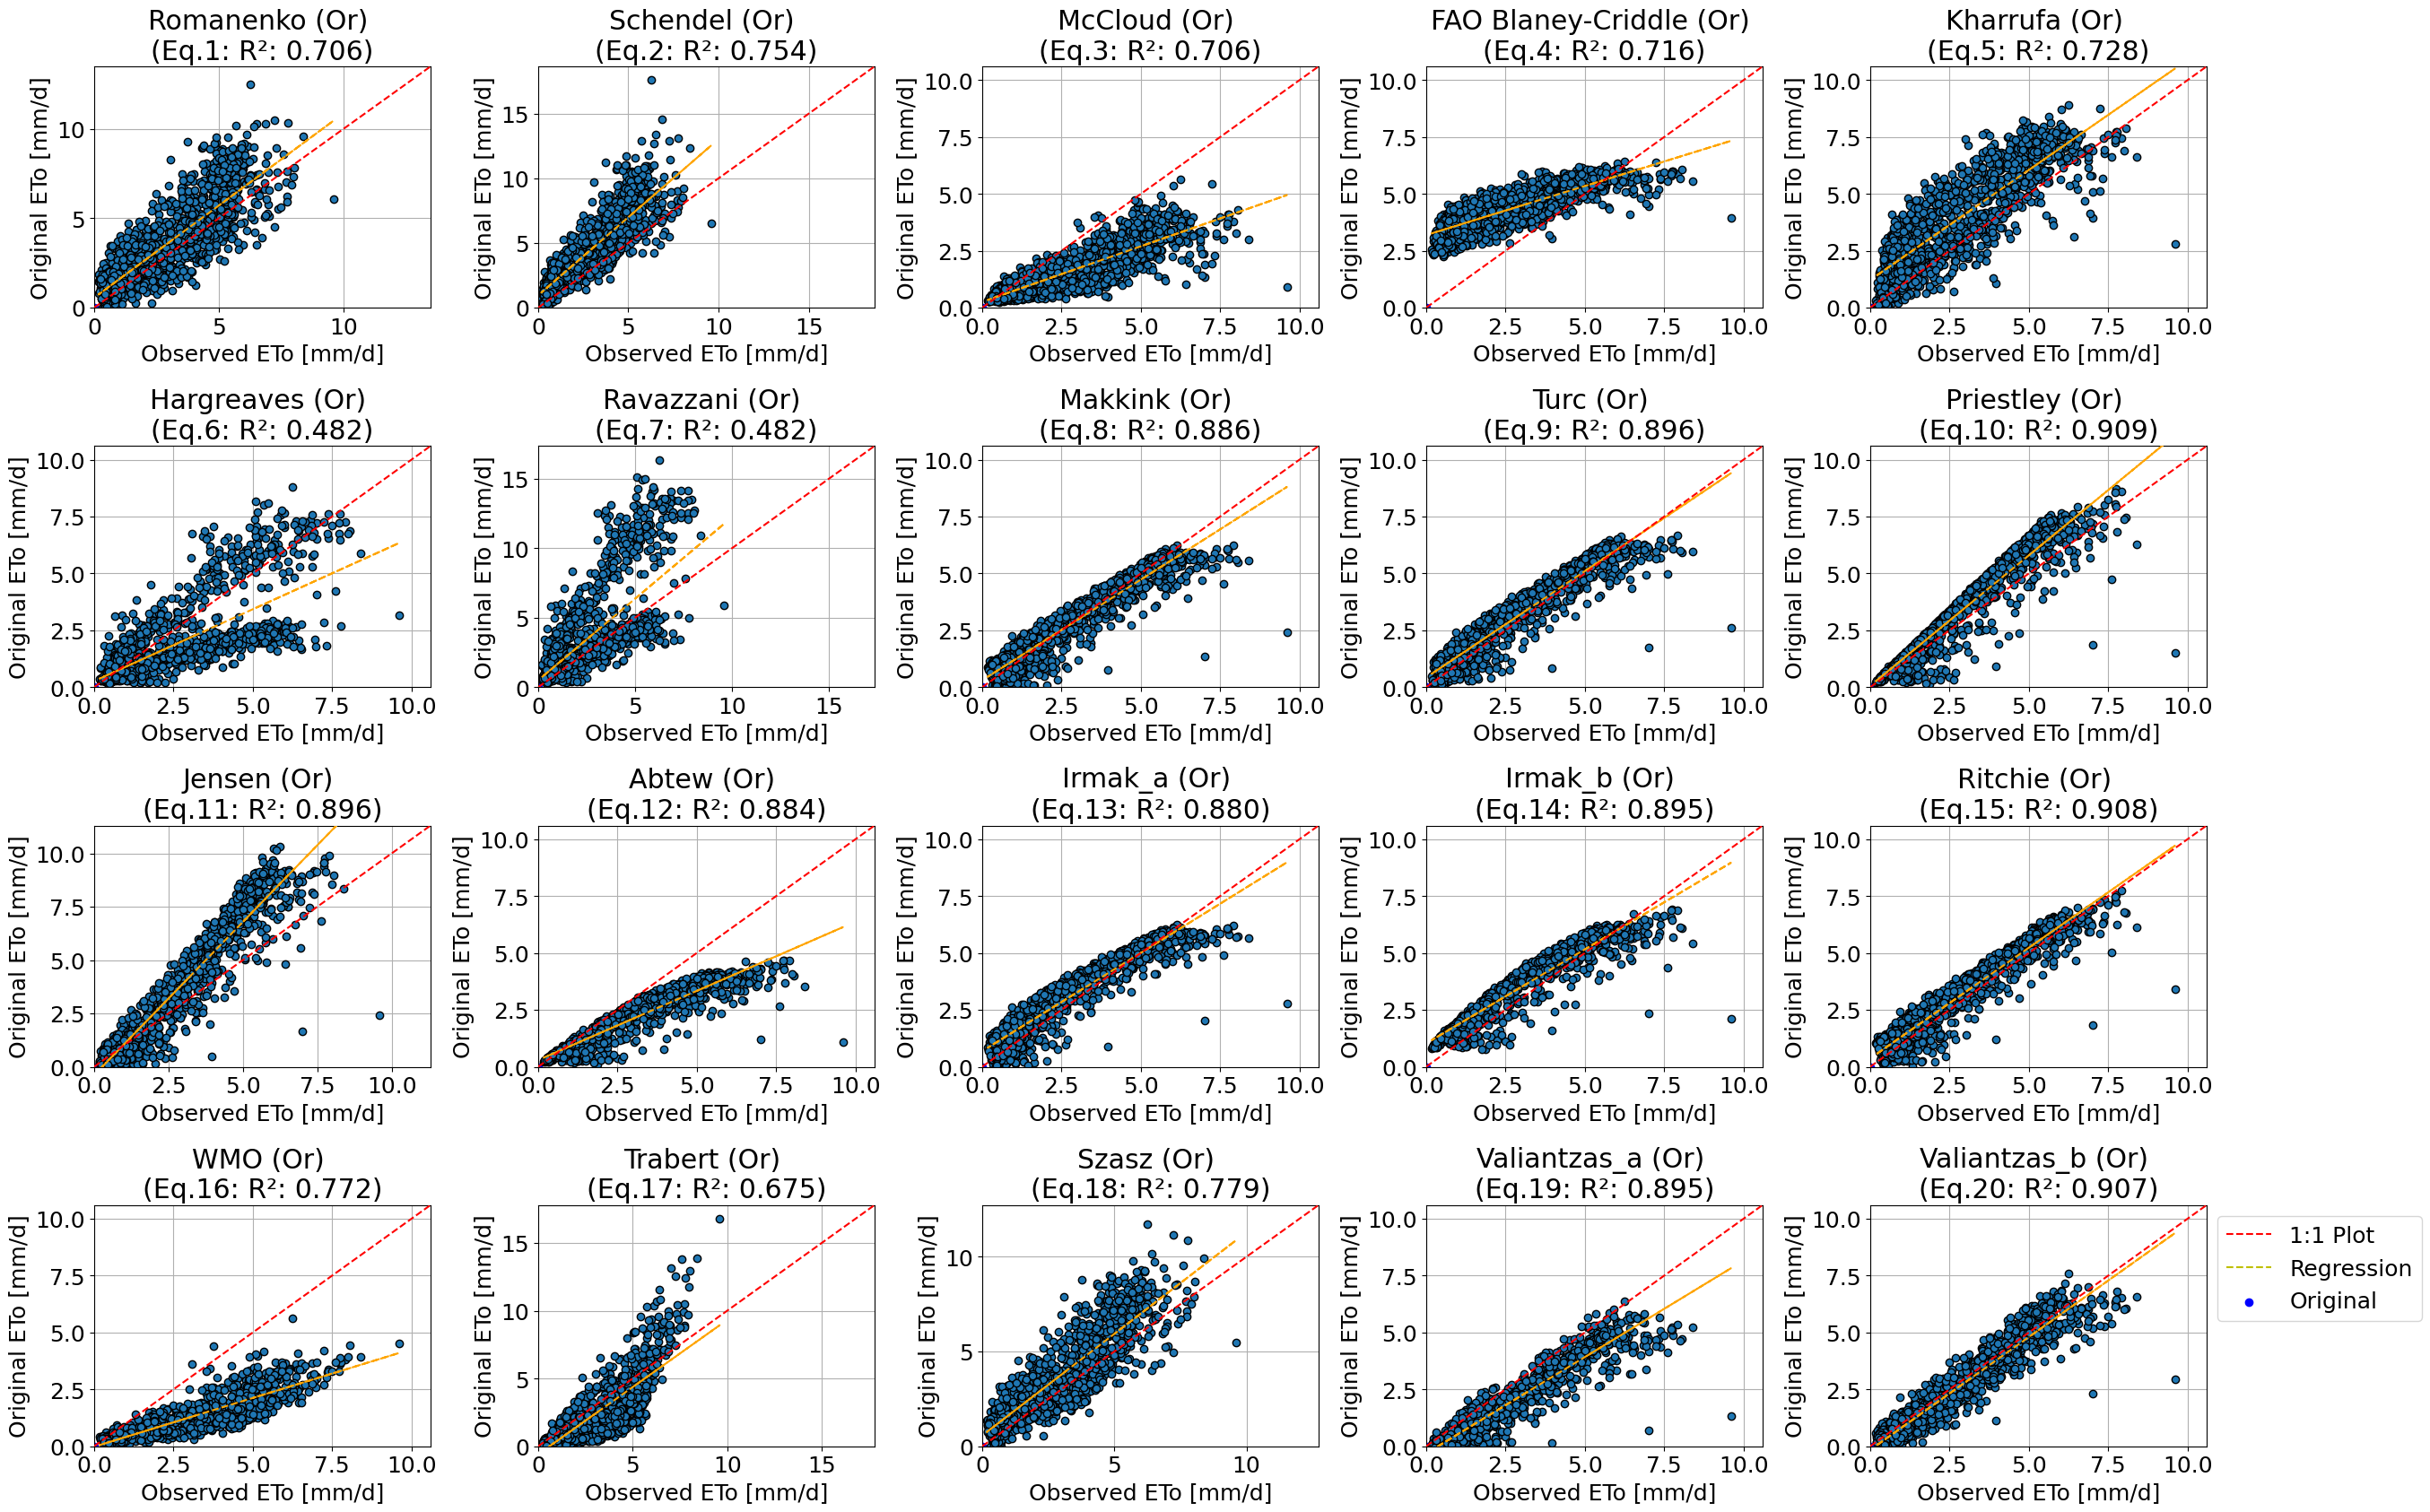

In [28]:
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 18})

models = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9, y_pred_10, y_pred_11, y_pred_12, y_pred_13, y_pred_14, y_pred_15, y_pred_16, y_pred_17, y_pred_18, y_pred_19, y_pred_20]
originals = [y_org_1, y_org_2, y_org_3, y_org_4, y_org_5, y_org_6, y_org_7, y_org_8, y_org_9, y_org_10, y_org_11, y_org_12, y_org_13, y_org_14, y_org_15, y_org_16, y_org_17, y_org_18, y_org_19, y_org_20]
real = Y_test
stats = equations.reindex(['Eq.1', 'Eq.2', 'Eq.3', 'Eq.4', 'Eq.5', 'Eq.6', 'Eq.7', 'Eq.8', 'Eq.9', 'Eq.10', 'Eq.11', 'Eq.12', 'Eq.13', 'Eq.14', 'Eq.15', 'Eq.16', 'Eq.17', 'Eq.18', 'Eq.19', 'Eq.20', 'Eq.21'])

num=0
for i in range(20):
    num += 1
    plt.gcf().set_size_inches(25, 25)
    plt.subplot(6, 5, num)
    l1, l2 = plt.plot(0, 1, 'r--', 0, 1, 'y--')
    l3 = plt.scatter(0, 0, color = 'blue')
    plot_multregression_or(np.array(real), np.array(originals[i]))
    r2 = metrics(np.array(real), np.array(originals[i]))[-1]
    plt.title(u'{} (Or) \n(Eq.{}: R\u00b2: {:.3f})'.format(model_names[i], num, r2))

plt.tight_layout(pad=1.0)

plt.legend((l1, l2, l3), ['1:1 Plot', 'Regression', 'Original'], bbox_to_anchor=(1, 1))

plt.savefig(r'all_original.png');

### The calibrated

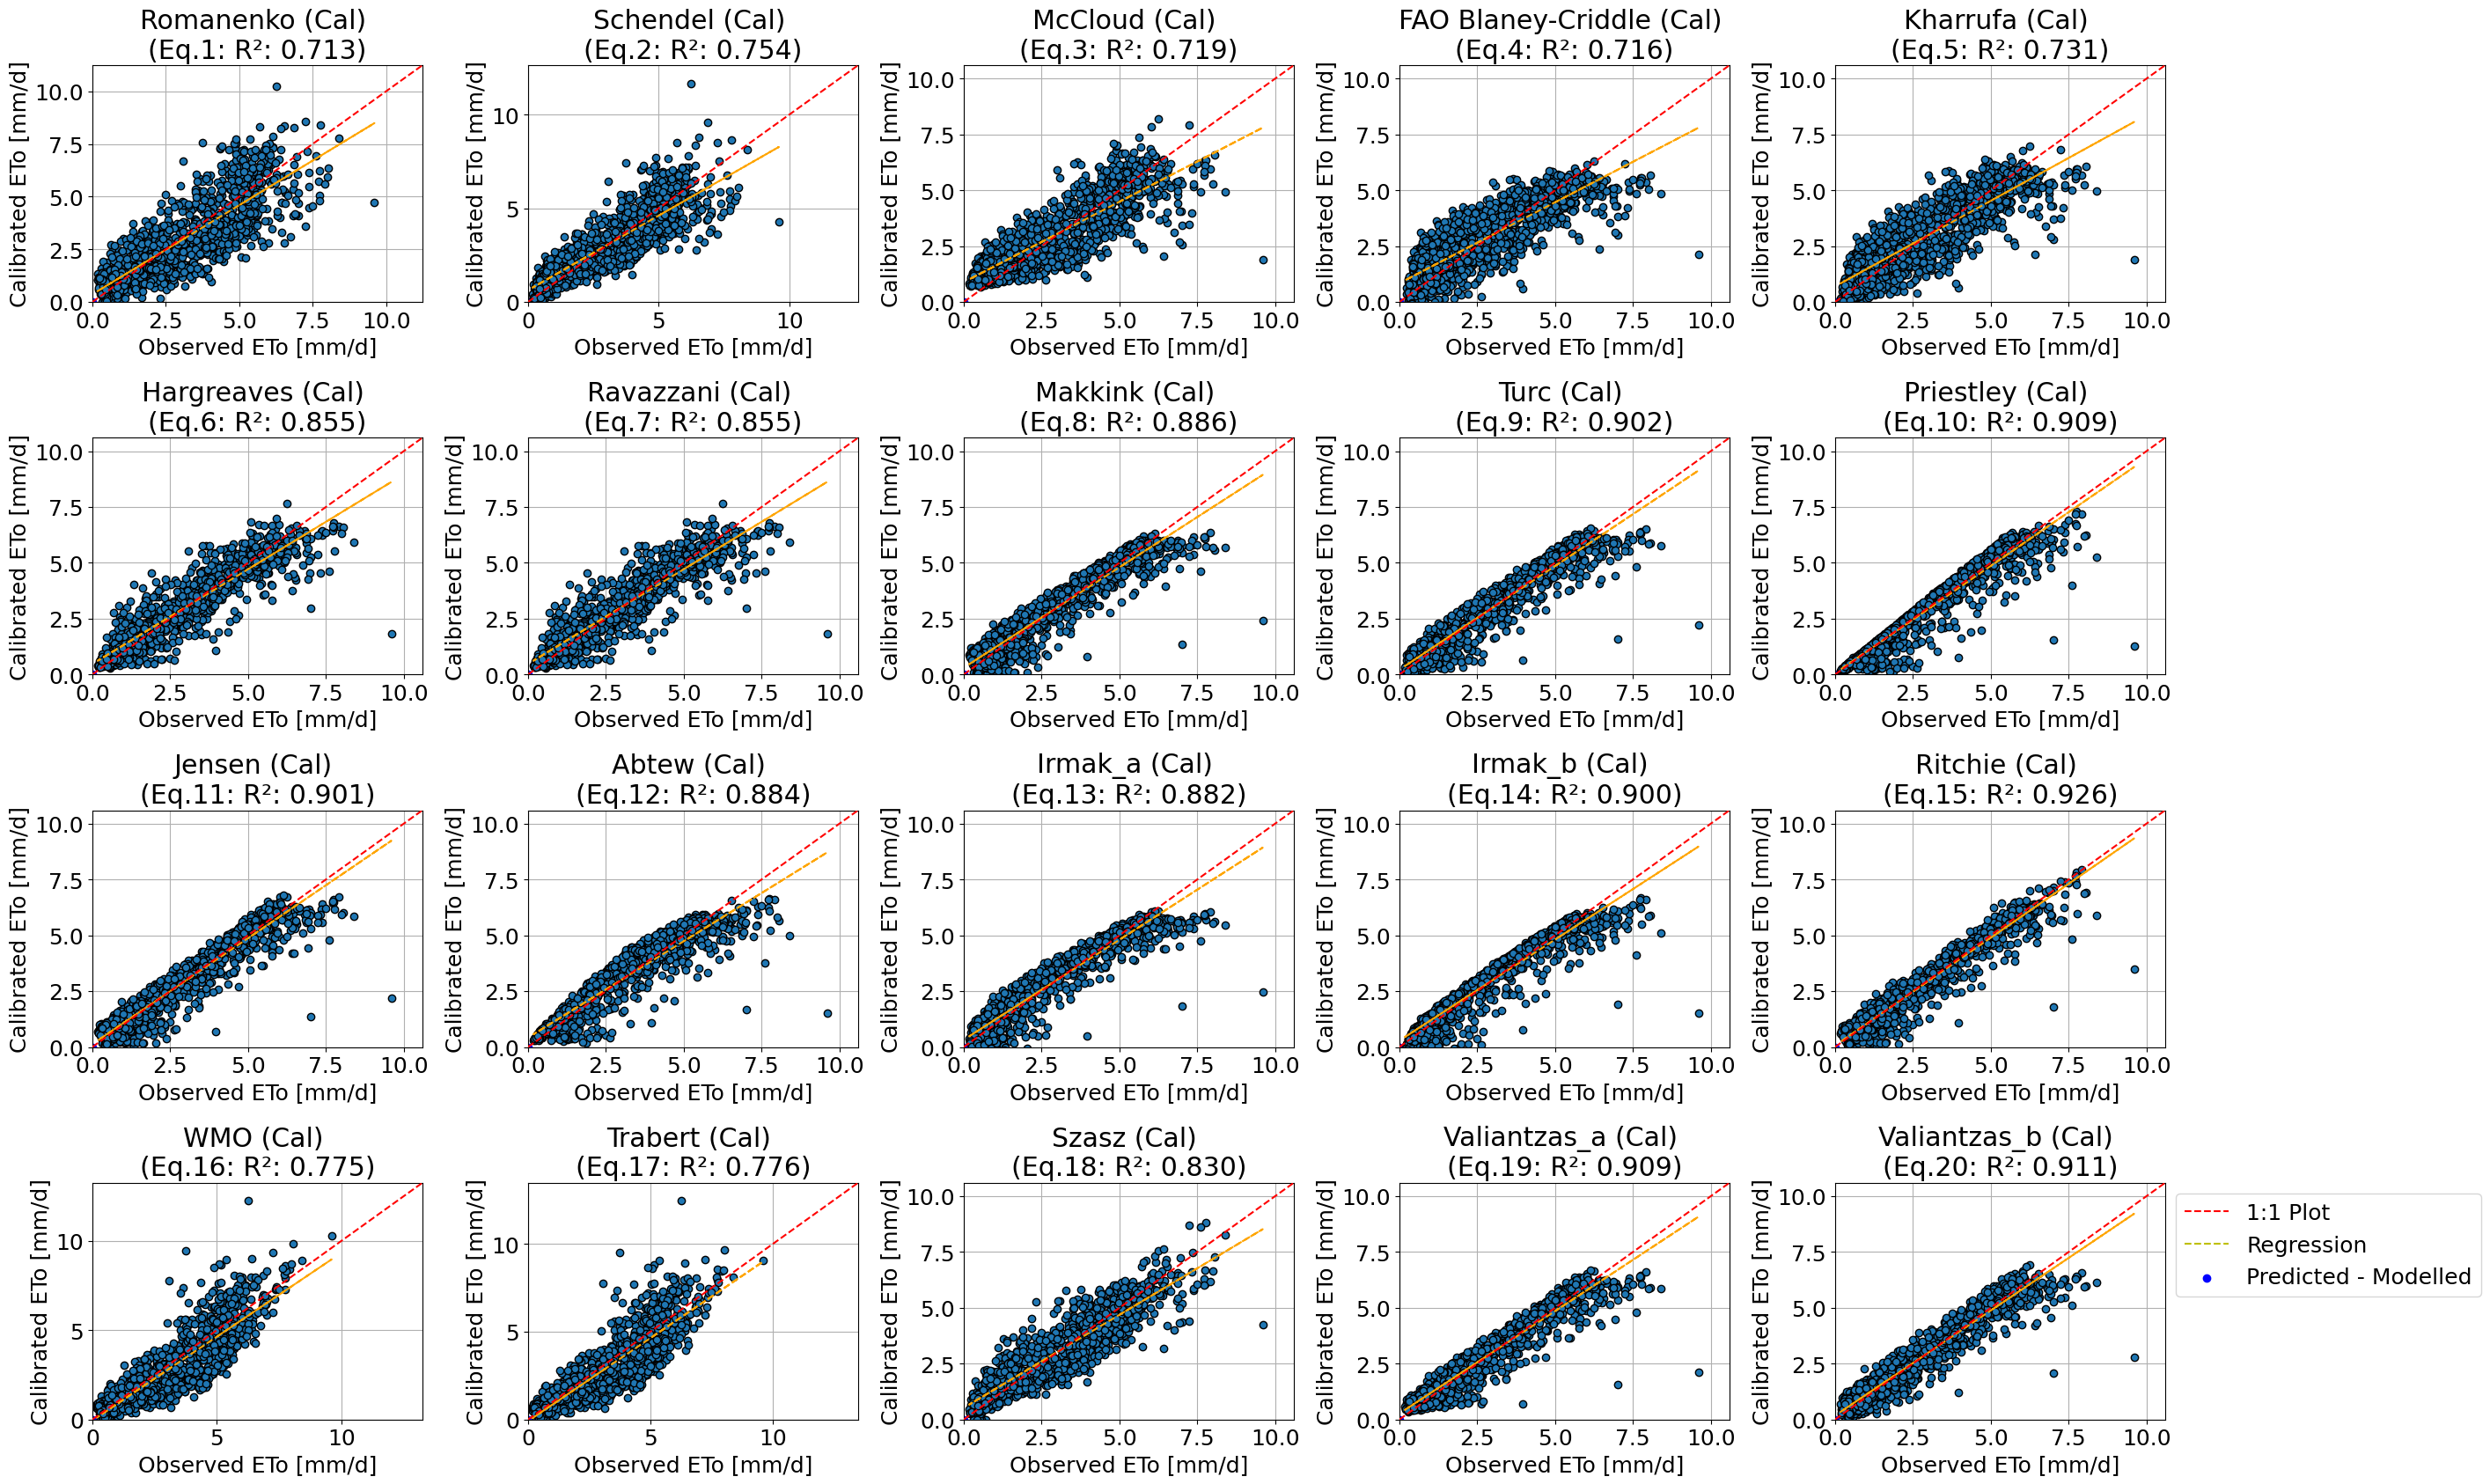

In [29]:
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 18})

models = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9, y_pred_10, y_pred_11, y_pred_12, y_pred_13, y_pred_14, y_pred_15, y_pred_16, y_pred_17, y_pred_18, y_pred_19, y_pred_20]
originals = [y_org_1, y_org_2, y_org_3, y_org_4, y_org_5, y_org_6, y_org_7, y_org_8, y_org_9, y_org_10, y_org_11, y_org_12, y_org_13, y_org_14, y_org_15, y_org_16, y_org_17, y_org_18, y_org_19, y_org_20]
real = Y_test
stats = equations.reindex(['Eq.1', 'Eq.2', 'Eq.3', 'Eq.4', 'Eq.5', 'Eq.6', 'Eq.7', 'Eq.8', 'Eq.9', 'Eq.10', 'Eq.11', 'Eq.12', 'Eq.13', 'Eq.14', 'Eq.15', 'Eq.16', 'Eq.17', 'Eq.18', 'Eq.19', 'Eq.20', 'Eq.21'])

num=0
for i in range(20):
    num += 1
    plt.gcf().set_size_inches(25, 25)
    plt.subplot(6, 5, num)
    l1, l2 = plt.plot(0, 1, 'r--', 0, 1, 'y--')
    l3 = plt.scatter(0, 0, color = 'blue')
    plot_multregression_cal(np.array(real), np.array(models[i]))
    r2 = metrics(np.array(real), np.array(models[i]))[-1]
    plt.title(u'{} (Cal) \n(Eq.{}: R\u00b2: {:.3f})'.format(model_names[i], num, r2))

plt.tight_layout(pad=1.0)
plt.legend((l1, l2, l3), ['1:1 Plot', 'Regression', 'Predicted - Modelled'], bbox_to_anchor=(1, 1))

plt.savefig(r'all.png');

In [30]:
difs = [c for c in predicted_all.columns.tolist() if 'Eq' in c]
diff_preds = predicted_all[difs].apply(lambda x: x-x[0], axis=1)
diff_orgs = original_all[difs].apply(lambda x: x-x[0], axis=1)

## Plot the daily residuals

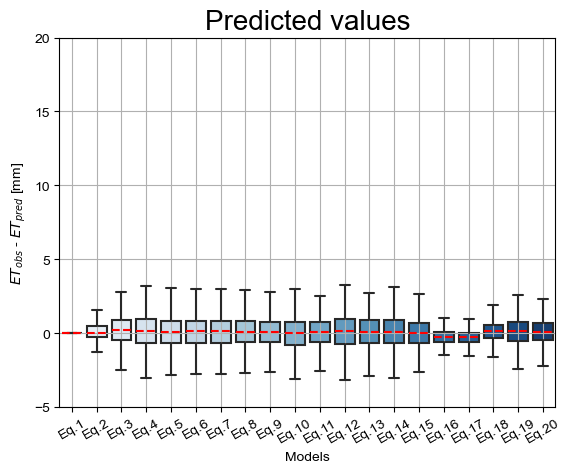

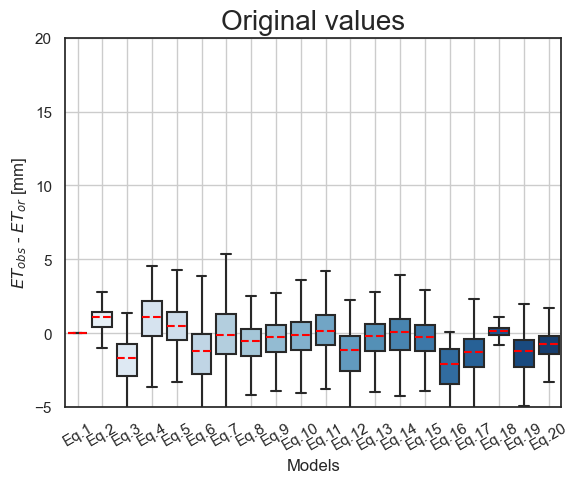

In [31]:
matplotlib.rcdefaults()

plt.figure()
plt.title('Predicted values', fontsize = 20)
sns.set(style="white", palette="RdBu", color_codes=True)
ax = sns.boxplot(data=diff_preds, medianprops={'color':'red', 'ls':'--'}, palette = 'Blues', showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Models')
plt.ylabel('$ET_{obs}$ - $ET_{pred}$ [mm]')
plt.ylim(-5, 20)
plt.grid();

plt.figure()
plt.title('Original values', fontsize = 20)
sns.set(style="white", palette="RdBu", color_codes=True)
ax = sns.boxplot(data=diff_orgs, medianprops={'color':'red', 'ls':'--'}, palette = 'Blues', showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Models')
plt.ylabel('$ET_{obs}$ - $ET_{or}$ [mm]')
plt.ylim(-5, 20)
plt.grid();

In [32]:
orders = metrics_mat.iloc[:, 6:12].copy()
order_eqs(orders)

Eq.15    0.950163
Eq.10    0.940537
Eq.19    0.895334
Eq.20    0.892774
Eq.14    0.878515
Eq.9     0.864272
Eq.11    0.833800
Eq.12    0.803150
Eq.8     0.761123
Eq.13    0.750668
Eq.6     0.674518
Eq.7     0.674517
Eq.18    0.531117
Eq.16    0.245768
Eq.17    0.244906
Eq.2     0.243468
Eq.5     0.153274
Eq.4     0.072571
Eq.3     0.070666
Eq.1     0.044481
dtype: float64

In [33]:
orders2 = metrics_mat.iloc[:, :6].copy()
order_eqs(orders2)

Eq.20    0.992755
Eq.8     0.980791
Eq.9     0.975836
Eq.15    0.973039
Eq.13    0.943003
Eq.10    0.921957
Eq.14    0.894735
Eq.19    0.877183
Eq.12    0.832899
Eq.11    0.701292
Eq.18    0.693857
Eq.1     0.632768
Eq.17    0.631516
Eq.3     0.571624
Eq.5     0.553142
Eq.6     0.485696
Eq.16    0.421437
Eq.2     0.375479
Eq.4     0.294841
Eq.7     0.126671
dtype: float64